
## Classification d'image multiclasses

## Architecture : CNN

## Dataset : MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


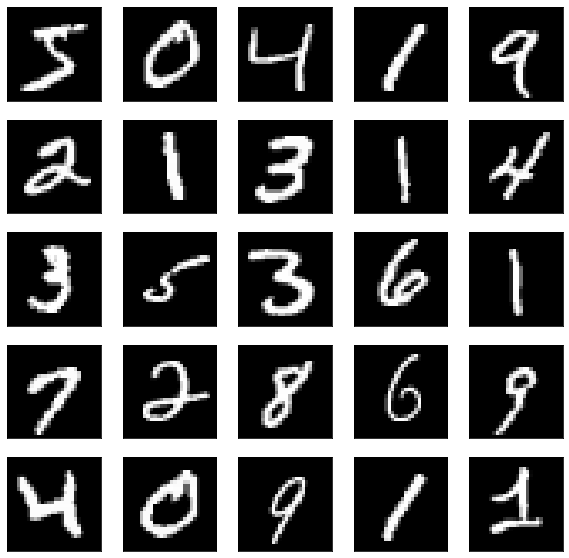

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='gray')
plt.show()

In [ ]:
train_images, test_images = train_images/255.0,test_images/255.0

In [ ]:
from sklearn.model_selection import train_test_split
train_images, val_images,train_labels,val_labels = train_test_split(train_images,train_labels,random_state=420,test_size=0.2)

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Input,Flatten,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras import Sequential
train_images.shape

(48000, 28, 28)

## LeNet

In [ ]:
model = Sequential()
model.add(Input((28,28,1)))
## Niveau 1 de convolution
model.add(Conv2D(16,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
## Niveau 2 de convolution
model.add(Conv2D(16,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
## Classification
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 16)       

## VGG Net

In [ ]:
def vggnet():
  model = Sequential()
  model.add(Input((28,28,1)))
  #Bloc VGG 1
  model.add(Conv2D(16,kernel_size=(2,2),activation="relu",padding="same"))
  model.add(Conv2D(16,kernel_size=(2,2),activation="relu",padding="same"))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  #Bloc VGG 2
  model.add(Conv2D(32,kernel_size=(2,2),activation="relu",padding="same"))
  model.add(Conv2D(32,kernel_size=(2,2),activation="relu",padding="same"))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  #Bloc VGG 3
  model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
  model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
  model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
  model.add(MaxPooling2D())
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  #Le classifieur
  model.add(Flatten())
  model.add(Dense(42,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  return model

In [ ]:
model = vggnet()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 16)        80        
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 16)        1040      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 14, 14, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_13 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 32)      

In [ ]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['acc'])
history = model.fit(train_images,train_labels,batch_size=32,epochs=10,validation_data=(val_images,val_labels))

Epoch 1/10
1500/1500 [==============================] - 15s 8ms/step - loss: 0.2155 - acc: 0.9298 - val_loss: 0.0827 - val_acc: 0.9743
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0743 - acc: 0.9773 - val_loss: 0.0525 - val_acc: 0.9834
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0601 - acc: 0.9815 - val_loss: 0.0437 - val_acc: 0.9872
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0474 - acc: 0.9854 - val_loss: 0.0423 - val_acc: 0.9868
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0422 - acc: 0.9869 - val_loss: 0.0428 - val_acc: 0.9872
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0405 - acc: 0.9875 - val_loss: 0.0441 - val_acc: 0.9857
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0354 - acc: 0.9889 - val_loss: 0.0393 - val_acc: 0.9876
Epoch 8/10
1500/1500 [==============================] -

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [insurance]')
  plt.legend()
  plt.grid(True)

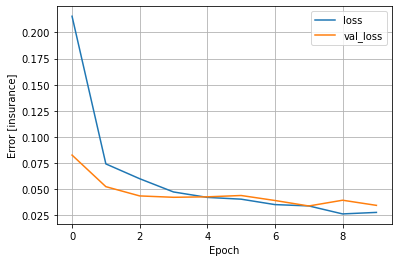

In [ ]:
plot_loss(history)

In [ ]:
##On va evaluer le model
test_labels_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Probabilité que label egal à 0 : 8.312251225106593e-07
Probabilité que label egal à 1 : 0.9999351501464844
Probabilité que label egal à 2 : 5.545369958781521e-07
Probabilité que label egal à 3 : 1.6028609550744477e-08
Probabilité que label egal à 4 : 3.654031388578005e-05
Probabilité que label egal à 5 : 7.755727438052418e-07
Probabilité que label egal à 6 : 3.469113835308235e-06
Probabilité que label egal à 7 : 1.4929347003089788e-07
Probabilité que label egal à 8 : 2.2432563127949834e-05
Probabilité que label egal à 9 : 1.3940388043920393e-07


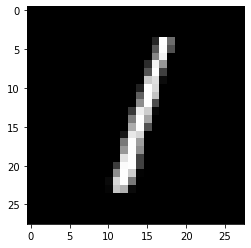

In [ ]:
for index in range(len(test_labels_pred[2])):
  print('Probabilité que label egal à {} : {}'.format(index,test_labels_pred[2][index]))

plt.figure()
plt.grid(False)
plt.imshow(test_images[2],cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0249 - acc: 0.9927


[0.02494354359805584, 0.9926999807357788]